In [20]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('dummydata.csv')

In [21]:
# Clean up data, make every rating match to be XX numbers (out of 100)
df['Internet Movie Database'] = df.apply(lambda row: row['Internet Movie Database'][0:3].replace('.', '').replace(',', ''), axis=1).astype(np.int64)
df['Rotten Tomatoes'] = df.apply(lambda row: row['Rotten Tomatoes'][0:2], axis=1).astype(np.int64)
df['Metacritic'] = df.apply(lambda row: row['Metacritic'][0:2], axis=1).astype(np.int64)

# Remove deprication warnings and make room for plot explinations
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
def year_vs_bechdel_bar():
    # Plot average Bechdel test score by year
    df_year = df.groupby('Release Year').mean()['Bechdel Score']
    df_year.plot(kind='bar', title='Average Bechdel test score by year', ylabel='Bechdel Test Score')
    plt.show()

In [7]:
def rating_vs_score_bar():
   # Plot average rating from each site for each bechdel test score
    df_rating = df.groupby('Bechdel Score').mean()
    df_rating.plot(y=['Internet Movie Database', 'Rotten Tomatoes', 'Metacritic'], kind='bar', title='Average movie rating for each Bechdel Test Score', ylabel='Movie rating out of 100')
    plt.show() 

In [8]:
def bechdel_score_pie():
    # Pie chart showing the percentage of movies for each bechdel test score
    df_score_count = df['Bechdel Score'].value_counts()
    df_score_count.plot(kind='pie', legend=True, title='Bechdel Test Scores', ylabel='', autopct='%1.1f%%')
    plt.show()

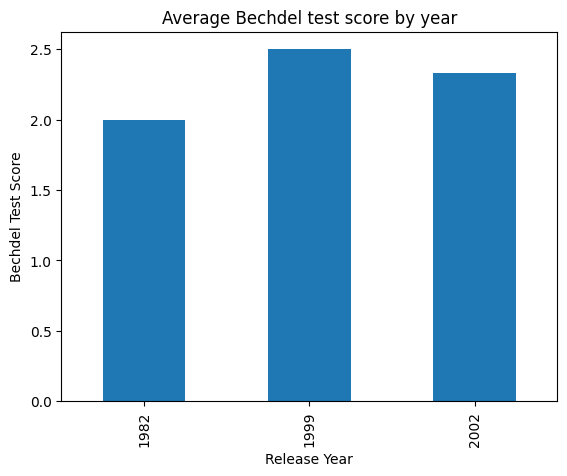

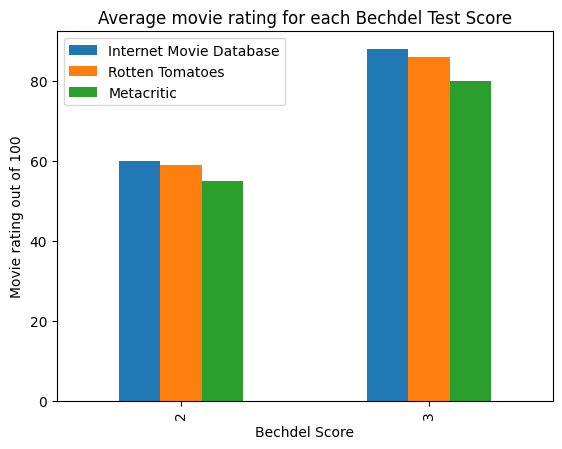

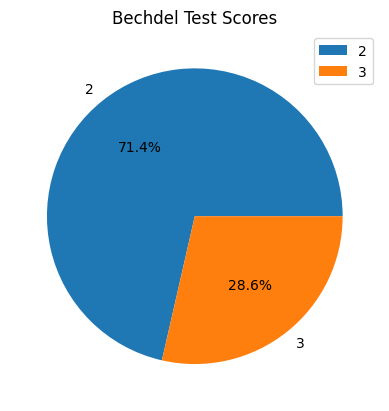

In [22]:
year_vs_bechdel_bar()
rating_vs_score_bar()
bechdel_score_pie()